# Python and Numpy tips for MATLAB users

There are decent online guides to converting between MATLAB and numpy, but they mostly cover specific mathematical / statistical functions, or commands for manipulating arrays. Here I review some points that pertain to the Python vs. MATLAB idioms more generally. I expect that you're familiar with some basic Python (e.g. functions, importing modules), and that you understand in general how control flow works in code (e.g. assignments, if-statements, for-loops).

For each Python feature, I provide 

1) an explanation of its differences with MATLAB (and usually explain why the Python way is preferred)

2) some example Python code showing that feature.

3) a comprehension question or exercise that will use or stretch your knowledge of the feature.

4) a "P.S." explaining potentially confusing parts of my example code.

At the bottom, I've also included a "lightning round" of shorter examples! Don't miss these -- they contain hints that will speed up your code and your programming many times over!

My ~~least-favorite~~ favorite part of learning Python has been discovering all the little ~~stupid quirks~~ goodies that exist within it -- the goal of the "P.S." elements is to ~~save you from banging your head against the table for hours~~ introduce some of those cool features.

For an online guide see:
* https://numpy.org/doc/stable/user/numpy-for-matlab-users.html
* 

___

# Data Containers: (), [], and {}
* One of the first things you'll notice about Python code is a lot of square brackets in a place where you'd normally expect parentheses in MATLAB: 

~~`x = some_numbers(0:10)`~~

`x = some_numbers[0:10]`. 

* Parentheses in Python are never used for indexing; instead, they are either for calling functions (most of the time) or for creating tuples (a built-in data type). Square brackets are used for all cases of indexing. This creates a nice visual distinction that doesn't exist in MATLAB.
    * For instance, in MATLAB, will this code call a function or return a value: `vote(10)` ? 
    * Usually MATLAB programmers use verbs for functions and nouns for matrices, so using the ambiguous `vote` is a bit of an antagonistic example, but you get the point. 
     * In Python, the answer is clear: `vote(10)` will return some value that is a "vote" on the number 10, whereas `vote[10]` might return a vote from index 10 in a list of votes.
     * NB: in Python, it would still be bad practice to call either a function or a variable "vote." A good function name might be `get_vote()`, and a better variable name might be `vote_list`.

___

### Example 1: lists (and functions)
In this example, we vote on numbers: even numbers are the best and get a vote of 10. Odd numbers are bad and get a vote of 0. We store the vote results in a list. `append()` is a function that is a property of all Python lists (aka a method) that adds its argument to the list.

*Q1: How many different functions (and methods) are used in this example?*

In [2]:
def get_vote(value):
    """Votes on the value! Even numbers rule.
    """
    if value % 2 == 0:
        return 10
    else:
        return 0
    
vote_list = []  # a Python list
for i in range(10):
    vote_list.append(get_vote(i))  # in-place
vote_list



[10, 0, 10, 0, 10, 0, 10, 0, 10, 0]

**PS**: note that we don't write

~~`vote_list = vote_list.append(...)`~~. 

This is because append() works *in-place*; it modifies the list, rather than returning a list. This has to do with how lists are built under the hood and can lead to some unexpected behavior if you're unprepared for it. We will return to this later to review best practices.

___

### Example 2: dictionaries
* In MATLAB, curly braces {} are used to create cell arrays. Python doesn't have a notion of cell arrays; lists are the most similar data type, as they can contain anything in each spot. An example of a list is shown in the above voting example.
* In Python, curly braces create **dictionaries**. Dictionaries are similar to structs in MATLAB, in that they contain key/value pairs. For instance, you might have a dictionary for the grades of students in a class, where the keys are student names and the values are student grades:

*Q2: dictionaries can contain other dictionaries! Modify the code below so that `student_grades` contains a dictionary of grades for many different tests (e.g. `{'SAT': 2200, 'LSAT':180}` and print out one of those grades for each student.*

In [3]:
def to_ordinal(n):
    """Transforms a number into its ordinal string.
    (A nice hack from: https://stackoverflow.com/questions/9647202/ordinal-numbers-replacement)
    """
    return "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])


student_grades = {'Jonah': 83, 'David': 98, 'Ella': 100}
for i,student in enumerate(student_grades):
    grade = student_grades[student]
    print(f'{student} is the {to_ordinal(i)} student and has a grade of {grade}')
    
    

Jonah is the 0th student and has a grade of 83
David is the 1st student and has a grade of 98
Ella is the 2nd student and has a grade of 100


In [ ]:
# Put your code for Q2 here!

**PS**: in this example, you can see another use of the curly braces: *f-strings*. These are used by putting an "f" (for "format") in front of the string and enclosing any variables you want to print in braces: `f'the number is {number}'`. This is the newest / fanciest way to print strings whose values can change dynamically, i.e. based on the value of variables in the code. I use them all the time. There are only two big rules with f-strings: end with the same quotation mark you start with and do not use the same type of quotation mark inside and outside the f-string.

In [4]:
f'My grade is {student_grades['Jonah']}'  # fails due to interior single quote


SyntaxError: f-string: unmatched '[' (2937409782.py, line 1)

In [5]:
f'My grade is {student_grades["Jonah"]}'  # works


'My grade is 83'

___

# Zero-based indexing

In MATLAB, indexing begins at 1: `my_array(1)` is the first number in `my_array`.

In Python, not so: `my_array[1]` is the second number! The first is `my_array[0]`.

The reason for this is a long and tedious historical debate, but believe me: once you get used to 0-based indexing, you'll wonder how you survived without it.


___

### Example 3: adding values in every loop
In this example, we add some numbers into a vector on every loop iteration. Look how clean the Python code is: it's intuitive what it's doing just from looking at the numbers.

*Q3: in this example, we use `range(10)` to get 10 for-loop iterations. `range(10)` is essentially a list that contains 10 values. Python will set `i`, the iterator in the loop, equal to each value in turn. Run the code `list(range(10))` to see what those values would be -- what do you notice? Now run the code `my_vector[100]` -- what happens? Keep investigating by running little bits of code until you understand how the indexing works in this for loop. What is the maximum value  `x` for which you can run `my_vector[x]` without an error?*

*Hint: if you're confused, this link may be helpful: https://www.w3schools.com/python/numpy/numpy_array_slicing.asp*

In [6]:
import numpy as np
import matplotlib.pyplot as plt

my_vector = np.zeros(shape=100)  # create a vector of 100 zeros
for i in range(10):  # loop 10 times
    idx = i*10
    my_vector[idx:(idx+10)] = np.random.normal(loc=i, size=10)  # add 10 random values to my_vector
    

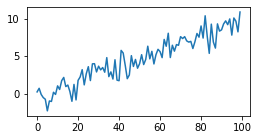

In [7]:
plt.figure(figsize=(4,2))
plt.plot(my_vector)

In [34]:
# Put the code for Q3 here!

**PS**: note that the better way to do something like this, in both MATLAB and Python, is to use a `reshape()` function: generate 100 values, then reshape into a 10x10 matrix. But `reshape()` only works when you have access to all the data at once (e.g. generating random values or reading from a list that already exists). Sometimes you'll need to read in a file, store some data into a vector, move to the next file, store its data, and so forth -- and that is the use case where zero-based indexing really shines.

**PPS**: 

If you want to compare, here's the MATLAB code for the same idea:

```
my_vector = zeros(100,1);
for i=1:10
    idx = (i-1)*10;
    my_vector((idx+1):(idx+10)) = i + randn(10,1);
end
```

What is that (i-1) term doing? And then later there's an idx+1? Huh?? This code is only clear if you're a MATLAB whiz!

___

# Plotting data
Plotting data is actually similar in Python and MATLAB, thanks to a package called `matplotlib` that was designed to re-create MATLAB-style plotting in Python. Matplotlib isn't "better" than MATLAB's plotting per se, but because it's Python, many people have built other, fancier packages on top of matplotlib, like `seaborn`, that I think are indeed much better than MATLAB.

___

### Example 4: line plots
*Q4: the example below plots some data over time. Look up the `hist()` (histogram) function of matplotlib. Then make a histogram showing the distributions of the two datasets. Be sure that 1) you can see both datasets on the same figure (you'll need to change the transparency, or find the option that specifies not to color in the faces of the histogram bars); 2) you normalize the histograms to plot probability density instead of number of occurrences; and 3) that you include a legend and label your axes.*

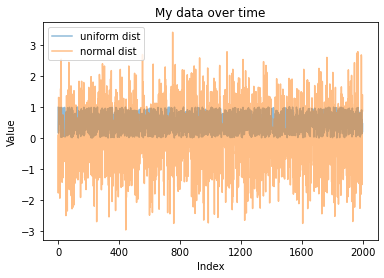

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
N = 2000
time = np.arange(N)  # similar to built-in range() but returns a numpy array instead of a range() object
data = np.random.random(size=N)
data2 = np.random.normal(size=N)


# Make a line plot
plt.figure()
plt.plot(time, data, label='uniform dist', alpha=0.5)
plt.plot(time, data2, label='normal dist', alpha=0.5)
plt.xlabel('Index')
_ = plt.xticks(np.arange(0,N+1,int(N/5)))  # the _ in front is just to suppress some superfluous text output
plt.ylabel('Value')
plt.title('My data over time')
plt.legend()

In [ ]:
# Put your code for Q4 here!

**PS**: here's an example of why seaborn is so nice...

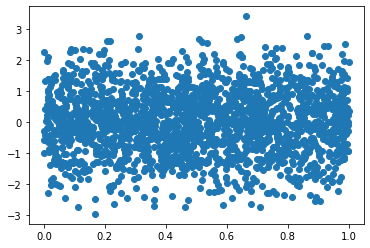

In [9]:
plt.scatter(data,data2)  # unintelligible

Text(27.0, 0.5, 'data2')

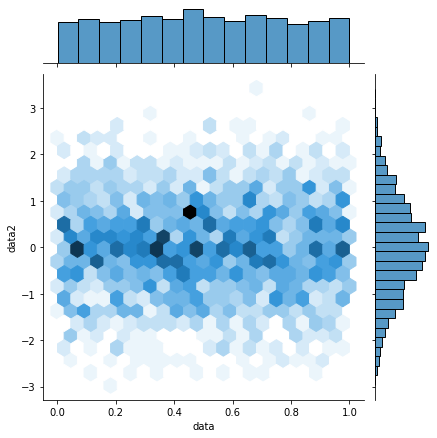

In [10]:
from seaborn import jointplot
jointplot(x=data, y=data2, kind='hex')  # ahhhhhh, better
plt.xlabel('data')  # and because seaborn is secretly just matplotlib, these commands still work!
plt.ylabel('data2')

___

# Extracting sub-matrices
Admittedly, this is a bit of a niche topic, but it's one place where I think MATLAB beats numpy -- so I want to show you the numpy trick that solves the problem.

Let's say you have a 100 x 100 matrix `spike_data` where each row i is a neuron, and each column j represents its firing rate on a trial of an experiment. 

In MATLAB, if you wanted to extract the data from the `neuron_set` neurons and the `trial_set` trials, you would simply write: `spike_data(neuron_set, trial_set)` and you would get the matrix. For example:

```
t = reshape(1:100, 10, 10);
t =

     1    11    21    31    41    51    61    71    81    91
     2    12    22    32    42    52    62    72    82    92
     3    13    23    33    43    53    63    73    83    93
     4    14    24    34    44    54    64    74    84    94
     5    15    25    35    45    55    65    75    85    95
     6    16    26    36    46    56    66    76    86    96
     7    17    27    37    47    57    67    77    87    97
     8    18    28    38    48    58    68    78    88    98
     9    19    29    39    49    59    69    79    89    99
    10    20    30    40    50    60    70    80    90   100
    
    
neuron_set = 1:4
trial_set = 4:7
sub_matrix = t(neuron_set, trial_set)
sub_matrix = 

    31    41    51    61
    32    42    52    62
    33    43    53    63
    34    44    54    64
```

But try the same thing in numpy and it doesn't work:

In [11]:
t = np.arange(1,101).reshape(10,10, order='F')   # 'F' makes numpy do reshaping in the same column/row order that MATLAB uses
neuron_set = [0,1,2,3]
trial_set = [3,4,5,6]
t[neuron_set, trial_set]

array([31, 42, 53, 64])

Numpy assumes that you meant you wanted the items [0,3], [1,4], [2,5], and [3,6]. If you want it to behave like MATLAB, you'll need to use "slicing" instead of lists:

In [12]:
t[0:4, 3:7]

array([[31, 41, 51, 61],
       [32, 42, 52, 62],
       [33, 43, 53, 63],
       [34, 44, 54, 64]])

This is fine and dandy until you want to extract non-consecutive rows or columns. For example, to generate random subsets of your data on which to cross-validate a classifier! MATLAB does it fluently:

```
t([2,5,6], [3,7,8])
ans =

    22    62    72
    25    65    75
    26    66    76
```

But you can't do slicing irregularly like that. So instead numpy provides a special function called `ix_()` (note the underscore) to solve this problem:



In [13]:
t[np.ix_([1,4,5], [2,6,7])]

array([[22, 62, 72],
       [25, 65, 75],
       [26, 66, 76]])

___

### Example 5: np.where()
Similar to the above scenario, say you have a 10 x 10 matrix `spike_data` where each row i is a neuron, and each column j represents its firing rate on a trial of an experiment. We want to extract spike data for some "good neurons" on some subset of trials corresponding to a particular category (say, a visual stimulus).

*Q5: often, we have more than one condition by which we want to filter neurons. For example, maybe we only want to look at putative excitatory neurons, with a mean spike rate greater than some threshold, from one particular brain region. Copy and extend the example code to simulate a situation like this. Hint: there are two approaches here -- you can run np.where() on each condition and then look for overlapping indices (the Python type `set` might be helpful), or you can combine all the conditions (the function `np.logical_and()` might be helpful) and then use np.where() once at the end. Pick an approach and commit to it!*

In [14]:
n = 10

# Generate the toy data
data = np.random.random(size=(n,n))
neuron_goodness = np.random.random(size=n)
trial_categories = np.random.randint(low=0, high=3, size=n)  # again, high is exclusive, so will be 0, 1, or 2

# Find good neurons
neuron_idx = np.where(neuron_goodness > 0.5)[0]

# Find desired trials
trial_idx = np.where(trial_categories == 2)[0]

# Extract the submatrix
sub_matrix = data[np.ix_(neuron_idx, trial_idx)]
sub_matrix

array([[0.18680121, 0.7180808 , 0.72250471, 0.4827253 ],
       [0.91335811, 0.6497386 , 0.87715088, 0.0830861 ],
       [0.17663392, 0.88235979, 0.25980068, 0.7931131 ],
       [0.85010625, 0.65787347, 0.22019839, 0.97288827],
       [0.15525996, 0.84618144, 0.84289824, 0.21313335],
       [0.74466446, 0.13722587, 0.35593795, 0.75048191]])

In [41]:
# Put code for Q5 here!
n = 30  # use more neurons since you'll have more conditions and hence sparser data

**PS**: notice the `[0]` tacked onto the end: `np.where(..)[0]`? That's because `np.where()` actually returns a tuple, where each element of the tuple contains the indices of the desired elements *for each dimension of the array*. For example:

In [15]:
idx = np.where(t>50)
idx

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
        8, 9, 9, 9, 9, 9]),
 array([5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6,
        7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8,
        9, 5, 6, 7, 8, 9]))

In [80]:
print(type(idx))
print(idx[0])
print(idx[1])

<class 'tuple'>
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]
[5 6 7 8 9 5 6 7 8 9 5 6 7 8 9 5 6 7 8 9 5 6 7 8 9 5 6 7 8 9 5 6 7 8 9 5 6
 7 8 9 5 6 7 8 9 5 6 7 8 9]


This is convenient, because it allows you to blindly pass `idx` (the tuple) back into `t` to get out the values you requested:

In [19]:
t[idx]

array([ 51,  61,  71,  81,  91,  52,  62,  72,  82,  92,  53,  63,  73,
        83,  93,  54,  64,  74,  84,  94,  55,  65,  75,  85,  95,  56,
        66,  76,  86,  96,  57,  67,  77,  87,  97,  58,  68,  78,  88,
        98,  59,  69,  79,  89,  99,  60,  70,  80,  90, 100])

Note that MATLAB's `find` will work like this if you ask it to: `[row_idx, col_idx] = find(t > 50);` 
but then the above sub-matrix indexing comes back to haunt you: `t(row_idx, col_idx)` won't return the values you think it will! 

This is a weird quirk of MATLAB: its functions (e.g. `find()`) return different things depending on what you put on the left side of the assignment. If you had done `idx = find(t > 50);`, then MATLAB uses "linear indexing" and `t(idx)` gives you what you want: the values of t larger than 50. But this inconsistency in how you can use the output of `find()` just makes the language messy and hard to remember.

Instead, numpy says, `np.where()` will always return the same thing no matter what -- it's up to you to figure out how to use it. (And by the way, numpy has no concept of "linear indexing.")



___

# Python's `is` and `None`
Python has a lot of fun little key-words that MATLAB doesn't have, and it's worth understanding how they work, if only because it gives you deeper insight into Python itself.

Everything in Python is an object -- even functions! Objects have id's in your computer's memory, and variables are just names for a particular spot in memory. Sometimes two variables actually point to the same spot in memory; that is to say, they're actually the same object. Python's `is` operator compares the memory id of two objects, and returns `True` if they're the same. This can be useful for debugging or just double-checking that everything is working.

In [20]:
def my_new_func():
    return 5

another_func = my_new_func
my_new_func is another_func

True

Note that two arrays with the same values will not match ids':

In [21]:
arr1 = np.array([1,2,3])
arr2 = np.array([1,2,3])
arr1 is arr2

False

(But Python does store a number of fixed objects for low integers -- so two variables that are both, say, 2, would match)

In [22]:
x = 2
y = 2
x is y 

True

In [23]:
x = 345
y = 345
x is y

False

Python also has a `None` object, which has type `None`, and is used similarly to NaN, but in non-numerical contexts. For instance, if a programmer wants to specify that a default key-word argument should be empty, they will use `kwarg=None`. More on functions and key-word arguments below! (Interestingly, there is only one `None` object -- all variables assigned `None` will point to the same place in memory.)

In [24]:
x = None
y = None
x is None

True

In [25]:
x is y

True

___

# Functions
Python is broader and more flexible than MATLAB, and a chief reason for that is Python's friendly and intuitive functions.


MATLAB defines a function like this:
```
function ave = average(x)
    ave = sum(x(:))/numel(x); 
end
```

Python does it like this:
```
def average(x):
    ave = np.sum(x) / np.size(x)
    return ave
```

Both have a keyword to indicate the function: MATLAB uses `function`, Python uses `def` (for "define"). Both list the arguments of the function next to it: `average(x)`. But the similarities stop there!




First of all, MATLAB generally requires functions to be housed in separate files from the main script, or at the bottom of the script. In Python, you can define them in line:


In [26]:
def new_func(val):
    return val+10
new_func(8)

18

Second of all, Python functions are "first-class objects." This means that unlike in MATLAB, where you can only pass functions around as "function handles," in Python you can do the same thing with functions that you can with any other object: you can assign it to a variable, put it in a list, etc. More on this later.

___

MATLAB isn't designed to allow users to set default arguments to their functions. (There are work-arounds which are extensively documented / debated, but none is particularly straightforward.) You might want to do this, for example, when writing data analysis functions that have a bunch of parameters, and you don't want to have to remember the correct parameters each time, let alone write them out in the code.

Python provides a straightforward way to pass defaults: set the function's variable equal to that value in the defintion. That variable becomes what's called a **keyword argument** to the function. If you don't provide a key-word argument when you call the function, the variable takes on its default value; otherwise, it takes the value you provided.

### Example 6: default keyword arguments
For example, here's a function I wrote to interpolate some data sampled at irregular intervals into data sampled at regular intervals. The variable `fs_interpd` is the desired interpolated sampling frequency in Hz; I decided that I wanted to use 200 Hz most of the time, but I wanted to be able to change it at will occasionally, so that I could use the function out of context.

*Q6: in jupyter notebooks, you can use the "?" operator on a function to see informaiton about it. For example, `interp_continuous?`. Use this to inspect the default keyword arguments for `plt.plot` and `np.max`. What does each keyword mean (you may have to look up the docs online)?*

In [27]:
from scipy.interpolate import interp1d

def interp_continuous(old_times, old_data, fs=200):
    f = interp1d(old_times, old_data)
    new_times = np.arange(np.min(old_times), np.max(old_times), 1/fs)
    new_data = f(new_times)
    return new_times, new_data

In [32]:
times = np.array([1,2])
data = np.array([1,2])
new_times, new_data = interp_continuous(times, data, fs=4)
new_data

array([1.  , 1.25, 1.5 , 1.75])

In [30]:
new_times, new_data = interp_continuous(times, data)  # fs is implicitly 200
new_data

array([1.   , 1.005, 1.01 , 1.015, 1.02 , 1.025, 1.03 , 1.035, 1.04 ,
       1.045, 1.05 , 1.055, 1.06 , 1.065, 1.07 , 1.075, 1.08 , 1.085,
       1.09 , 1.095, 1.1  , 1.105, 1.11 , 1.115, 1.12 , 1.125, 1.13 ,
       1.135, 1.14 , 1.145, 1.15 , 1.155, 1.16 , 1.165, 1.17 , 1.175,
       1.18 , 1.185, 1.19 , 1.195, 1.2  , 1.205, 1.21 , 1.215, 1.22 ,
       1.225, 1.23 , 1.235, 1.24 , 1.245, 1.25 , 1.255, 1.26 , 1.265,
       1.27 , 1.275, 1.28 , 1.285, 1.29 , 1.295, 1.3  , 1.305, 1.31 ,
       1.315, 1.32 , 1.325, 1.33 , 1.335, 1.34 , 1.345, 1.35 , 1.355,
       1.36 , 1.365, 1.37 , 1.375, 1.38 , 1.385, 1.39 , 1.395, 1.4  ,
       1.405, 1.41 , 1.415, 1.42 , 1.425, 1.43 , 1.435, 1.44 , 1.445,
       1.45 , 1.455, 1.46 , 1.465, 1.47 , 1.475, 1.48 , 1.485, 1.49 ,
       1.495, 1.5  , 1.505, 1.51 , 1.515, 1.52 , 1.525, 1.53 , 1.535,
       1.54 , 1.545, 1.55 , 1.555, 1.56 , 1.565, 1.57 , 1.575, 1.58 ,
       1.585, 1.59 , 1.595, 1.6  , 1.605, 1.61 , 1.615, 1.62 , 1.625,
       1.63 , 1.635,

**PS**: notice how the variable `f` in the example above is actually used as a function? This is possible because Python functions are just like any other Python object -- you can move them around, store them in lists, etc. `scipy.interpolate.interp1d()` actually *returns a new function* that will accept x-values and spit out y-values based on old_times and old_data! Most scientific computing in Python (e.g. with sk-learn) will use object oriented approaches to avoid having to pass functions around like this (e.g. `model=NewModel(); model.train(data); categories=model.predict(new_data)`) but Scipy's approach works well here since the interpolating function doesn't have much meta-data (e.g. cross-validated accuracy, likelihood, hyperparameters...) associated with it.

___

### Example 7: controlling program flow with default keywords
Default arguments make it very easy to control program flow. For instance, say you write a function that plots some data. Sometimes you want to just want the program to make the plot and save it, without showing it; other times you want to show it to the user. You can use default keyword arguments to easily implement this.

In [66]:
def my_plotting_func(time, data, save_fig=False):
    
    if save_fig:  # i.e., if save_fig has a value of True
        plt.plot(time, data)
        plt.savefig('my_fig.png')
        plt.close()
    else:
        plt.plot(time,data)

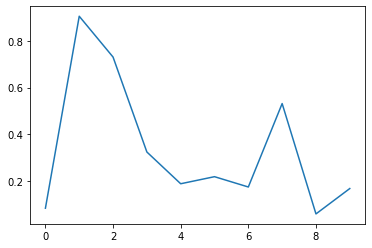

In [68]:
my_plotting_func(np.arange(10), np.random.random(10))

In [69]:
my_plotting_func(np.arange(10), np.random.random(10), save_fig=True)  # should show up in your current folder

**PS**: be careful to never use an empty list as a default function argument! For example, don't do ~~`def reverse_list(old_list, new_list=[])`~~. See detailed explanation here: https://florimond.dev/en/posts/2018/08/python-mutable-defaults-are-the-source-of-all-evil/.

___

Python functions, being objects, can do all the same things any other object can do. You can assign a variable to represent a function; you can pass functions as arguments to functions; or you can return functions from other functions. MATLAB does support this functionality, but in a rather obtuse and awkward way -- Python is designed to do this all day.

Why would we want to pass around functions as objects?

1) Some functions return other functions that can then be used later on. For example, the scipy interpolation functions work by first fitting an interpolating function to existing data, and then having the user call that function on some new data to be interpolated. You can see that in action in example 6.

2) A classic example of a function that takes a function as an argument is a function that computes definite integrals. The user defines a function `f(x)`, and passes that into some integral function, `definite_integral = integral(f, lower_bound, upper_bound)`.

3) Sometimes you want to define a function with some of its arguments already filled in. You can do this with the function `partial` from the library `functools`. For example, from the Python docs: `basetwo = partial(int, base=2)`, and then `basetwo('10010')` --> 18.


### Example 8: defining a custom legend function in matplotlib
I often make categorical plots, and want the legend to be similarly categorical. Matplotlib doesn't handle this very well. You can either assign a label to each line (not a viable solution after ~5 lines) or you can create your own custom legend.

Here's the worst case:

In [81]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2*np.pi, 0.1)
colors_by_category = {0:'red', 1:'blue'}

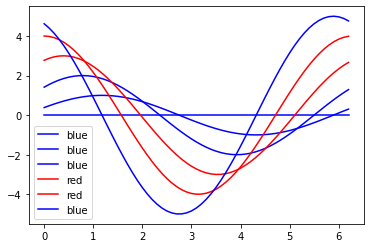

In [82]:
plt.figure()
for i in range(6):
    y = i*np.sin(x+(np.pi/8)*i)
    category = int(np.random.random(1)>0.5)
    plt.plot(x,y, color=colors_by_category[category], label=colors_by_category[category])
plt.legend()


Here is the better way:

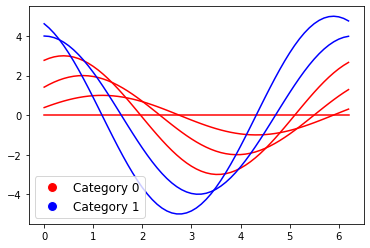

In [85]:
from matplotlib.lines import Line2D

plt.figure()
for i in range(6):
    y = i*np.sin(x+(np.pi/8)*i)
    category = int(np.random.random(1)>0.5)
    plt.plot(x,y, color=colors_by_category[category])
    
# Now make a legend with Line2D objects whose x and y values are just a point (0,0), but whose colors / names are what we want
plt.legend(handles=[Line2D([0], 
                           [0],
                           marker='o',
                           color='w',
                           label=f'Category {key}',
                           markerfacecolor=colors_by_category[key],
                           markersize=10)
                    for key in colors_by_category.keys()],
          fontsize=12,
          loc='lower left')


... but who wants to remember that whole mess of code every time?? Instead, let's just write a quick nested function!

In [115]:
def categorical_legend(colors_by_category):
    line_list = []
    for key in colors_by_category.keys():
        line_list.append(Line2D([0], [0], marker='o', color='w', label=f'Category {key}', 
                                markerfacecolor=colors_by_category[key], markersize=10))
    plt.legend(handles=line_list, fontsize=12, loc='lower left')
    

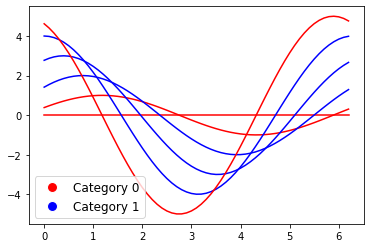

In [116]:
x = np.arange(0, 2*np.pi, 0.1)
colors_by_category = {0:'red', 1:'blue'}
plt.figure()
for i in range(6):
    y = i*np.sin(x+(np.pi/8)*i)
    category = int(np.random.random(1)>0.5)
    plt.plot(x,y, color=colors_by_category[category], label=colors_by_category[category])
categorical_legend(colors_by_category)

# Lightning Round

## Sets are your friend for fast look-ups

In [90]:
letters = set(['a', 'b', 'c'])
more_letters = set(['a','b','c','x','y','z'])
letters | more_letters  # eg, union of the sets

{'a', 'b', 'c', 'x', 'y', 'z'}

In [91]:
ints = list(range(int(1e7))) # all the integers from 0 - 10,000,000
set_of_ints = set(ints)

In [92]:
%%timeit
7542342 in ints

89.8 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
%%timeit
7542342 in set_of_ints  # roughly half a million times faster!

50.7 ns ± 0.0335 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Enumerate is so great

In [96]:
my_data = np.array([10,20,30])
for i,data in enumerate(my_data):
    print(i)
    print(data)

0
10
1
20
2
30


## Fast raster plots (or, Bisect is your friend for time windows)

In [98]:
import bisect
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# bisect.bisect_left(array, value) returns the index of array where you'd have to insert value to keep array sorted
print(bisect.bisect_left([1,2,3,4], 0))
print(bisect.bisect_left([1,2,3,4], 2))
print(bisect.bisect_left([1,2,3,4], 10))

0
1
4


In [100]:
# Let's simulate some spike data and show how to use bisect_left to generate rasters quickly

session_len = 3600  # one hour
n_spikes = session_len * 10   # eg 10 Hz avg firing rate

times = np.arange(0,session_len,0.1) 
spike_times = np.random.random(n_spikes)*3600  # uniform spikes between start and end of session
spike_times = np.sort(spike_times)
print(spike_times[0:10])

[0.07222882 0.09882848 0.11038599 0.1532765  0.22898702 0.28693095
 0.42877461 0.48163253 0.5800329  0.68044652]


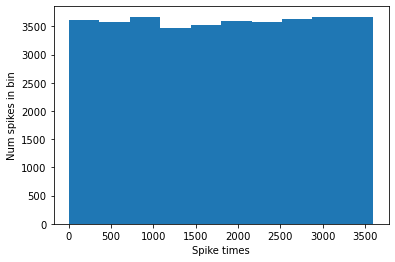

In [35]:
# verify we've got some spikes across the whole session
_ = plt.hist(spike_times)
_ = plt.xlabel('Spike times')
_ = plt.ylabel('Num spikes in bin')

In [102]:
# Make some fake trials and pick a time window to plot rasters around trial start times
trial_starts = [0,25,50,75]
trial_window = (-1,1) 

In [110]:
%%timeit
# using greater-than and less-than conditions to find spikes within the time window
aligned_spike_times = []
for start in trial_starts:
    this_trial_spikes = []
    window_back = start + trial_window[0]
    window_front = start + trial_window[1]
    for spike_time in spike_times:
        if (spike_time < window_front) and (spike_time > window_back):
            this_trial_spikes.append(spike_time - start)
    aligned_spike_times.append(this_trial_spikes)

In [114]:
# %%timeit
# using bisect_left to find spikes within the time window (about 1000x faster!)
bisect_aligned_spike_times = []
for start in trial_starts:
    this_trial_spikes = []
    window_back = start + trial_window[0]
    window_front = start + trial_window[1]
    back_idx = bisect.bisect_left(spike_times, window_back)
    front_idx = bisect.bisect_left(spike_times, window_front)
    bisect_aligned_spike_times.append(spike_times[back_idx:front_idx]-start)

#### Go back and comment out the %%timeit lines in each cell, and run them again before plotting
(%%timeit runs in its own little bubble so the changes to variables don't get saved)

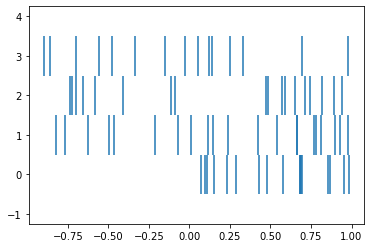

In [112]:
# Show that the two rasters are identical
plt.eventplot(aligned_spike_times)

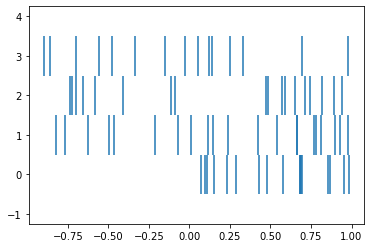

In [115]:
plt.eventplot(bisect_aligned_spike_times)

## Generators and functional programming

Haven't you ever thought, good lord, I'd really like to write fewer for-loops? With generators, now you can!

In [117]:
subjects = ['X', 'Y']
test_sessions = {'X': ['211120', '211121'],
                'Y': ['211120', '211123']}

In [118]:
# the old way...
for subject in subjects:
    for session in test_sessions[subject]:
            print(f'read file from subject {subject} session {session}...')
            print('do analysis one...')

for subject in subjects:
    for session in test_sessions[subject]:
            print(f'read file from subject {subject} session {session}...')
            print('do analysis two...')
            

read file from subject X session 211120...
do analysis one...
read file from subject X session 211121...
do analysis one...
read file from subject Y session 211120...
do analysis one...
read file from subject Y session 211123...
do analysis one...
read file from subject X session 211120...
do analysis two...
read file from subject X session 211121...
do analysis two...
read file from subject Y session 211120...
do analysis two...
read file from subject Y session 211123...
do analysis two...


In [120]:
# writing separate functions for loading and analysis is better...but the for loops are still there.
def load_data(subject, session):
    print(f'read file from subject {subject} session {session}...')
    return 'data'

def do_analyis(data, analysis_num):
    return data + f'_analyzed_{analysis_num}'

for subject in subjects:
    for session in test_sessions[subject]:
            data = load_data(subject,session)
            analysis = do_analyis(data, 1)
            print(analysis)  
            analysis = do_analyis(data, 2)
            print(analysis)  
            

read file from subject X session 211120...
data_analyzed_1
data_analyzed_2
read file from subject X session 211121...
data_analyzed_1
data_analyzed_2
read file from subject Y session 211120...
data_analyzed_1
data_analyzed_2
read file from subject Y session 211123...
data_analyzed_1
data_analyzed_2


Aha! Now we use a generator function `readfiles()` to `yield` the loaded data for each subject. The for loop lives within this generator function, so we only have to write it once. Now, no matter how many for-loops it takes to load in the unit of data that we need, we only need one for-loop in the main part, `for data in datafiles:`. For a great explanation of `yield` and generators, see here: https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do


In [124]:
def readfiles(subjects, test_sessions):
    for subject in subjects:
        for session in test_sessions[subject]:
            yield load_data(subject,session)

datafiles = readfiles(subjects, test_sessions)
for data in datafiles:
    analysis = do_analyis(data, 1)
    print(analysis)  

print('Moving to analysis 2...')
print ('\n')

datafiles = readfiles(subjects, test_sessions)
for data in datafiles:
    analysis = do_analyis(data, 2)
    print(analysis)  


read file from subject X session 211120...
data_analyzed_1
read file from subject X session 211121...
data_analyzed_1
read file from subject Y session 211120...
data_analyzed_1
read file from subject Y session 211123...
data_analyzed_1
Moving to analysis 2...


read file from subject X session 211120...
data_analyzed_2
read file from subject X session 211121...
data_analyzed_2
read file from subject Y session 211120...
data_analyzed_2
read file from subject Y session 211123...
data_analyzed_2


I'll admit that this isn't so shiny on its own. But maybe you're running an analysis with more layers: for each subject, for each session, for each imaging ROI, for each stimulus...converting your code from 4 to 1 nested for-loop is a huge time saver and makes everything easier to read and troubleshoot. 


## Making a list of balanced, randomized trials for a task (or, we <3 itertools)
We're setting up trials for an experiment where there are three stimuli presented to an animal at different latencies from it's inhalations. We want to randomize and balance conditions across each session. Making such a list is painful if you have to write it out yourself...the library `itertools` provides a function called `product` that will automatically create all the combinations of conditions for us!

In [131]:
import itertools as it
import numpy as np
import random

In [137]:
# Without itertools...nested for loops for each attribute...ugh

conditions = ['A', 'B', 'C']
latencies = [1,5,10]
num_repeats_per_combo = 4

num_total_trials = len(conditions)*len(latencies)*num_repeats_per_combo
trials = [0 for _ in range(num_total_trials)]  # pre-make the list so we can put each trial in at a random spot
indices = list(range(num_total_trials))

for i in range(num_repeats_per_combo):
    for j in range(len(conditions)):
        for k in range(len(latencies)):
            idx = random.randint(0, len(indices)-1)  # stop val is inclusive? hmm
            trials[indices.pop(idx)] = (conditions[j],latencies[k])
trials

[('C', 5),
 ('C', 1),
 ('A', 5),
 ('C', 1),
 ('C', 10),
 ('A', 10),
 ('A', 1),
 ('B', 10),
 ('C', 10),
 ('A', 5),
 ('A', 5),
 ('A', 10),
 ('B', 10),
 ('B', 10),
 ('A', 10),
 ('C', 5),
 ('B', 5),
 ('B', 1),
 ('C', 10),
 ('B', 5),
 ('B', 1),
 ('B', 1),
 ('A', 1),
 ('B', 1),
 ('A', 5),
 ('B', 10),
 ('B', 5),
 ('C', 10),
 ('C', 1),
 ('B', 5),
 ('C', 5),
 ('C', 1),
 ('A', 1),
 ('A', 1),
 ('C', 5),
 ('A', 10)]

In [136]:
# With itertools <3
conditions = ['A', 'B', 'C']
latencies = [1,5,10]
num_repeats_per_combo = 4
trial_vals = it.product(conditions, latencies)
trials = [(cond,lat) for (cond,lat) in trial_vals] * num_repeats_per_combo
# trials = random.shuffle(trials)  
random.shuffle(trials)
trials

[('A', 1),
 ('C', 10),
 ('A', 10),
 ('A', 5),
 ('A', 10),
 ('C', 10),
 ('A', 5),
 ('B', 10),
 ('A', 1),
 ('C', 10),
 ('B', 5),
 ('B', 5),
 ('A', 10),
 ('B', 5),
 ('A', 1),
 ('A', 5),
 ('B', 10),
 ('C', 1),
 ('C', 1),
 ('B', 1),
 ('C', 1),
 ('B', 1),
 ('B', 1),
 ('C', 1),
 ('C', 5),
 ('B', 1),
 ('A', 5),
 ('C', 5),
 ('C', 10),
 ('A', 10),
 ('C', 5),
 ('A', 1),
 ('B', 10),
 ('B', 10),
 ('B', 5),
 ('C', 5)]

## Working with file systems

In [141]:
import os

In [142]:
# Where are we?
current_dir = os.getcwd()
current_dir

'/Users/jonahpearl/Documents/PiN/G2/Python bootcamp '

In [143]:
# See current folder's contents
os.listdir(current_dir)

['my_fig.png',
 'python and numpy for matlab users.ipynb',
 'tips and tricks.pptx',
 '.ipynb_checkpoints']

In [144]:
# (Also works with relative paths)
os.listdir('.')

['my_fig.png',
 'python and numpy for matlab users.ipynb',
 'tips and tricks.pptx',
 '.ipynb_checkpoints']

In [145]:
# (Also works with any absolute path)
# (you should change this to a path that actually exists on your computer!)
os.listdir('/Users/jonahpearl/Documents/Arduino/libraries/')

['readme.txt']

In [146]:
# isdir can be very handy
folders = [f for f in os.listdir() if os.path.isdir(f)]
folders

['.ipynb_checkpoints']

In [147]:
# Can combine in many fun ways...
g_folders = [f for f in os.listdir() if (os.path.isdir(f) and 'g' in f)]
g_folders

[]

In [148]:
# I recommend always using absolute paths to minimize confusion, unless saving temporary files / figures
# abspath and join are great for this
[os.path.abspath(f) for f in folders]

['/Users/jonahpearl/Documents/PiN/G2/Python bootcamp /.ipynb_checkpoints']

In [149]:
# Joining two parts of a path
experiment_path = '/n/groups/datta/Jonah/Experiment'
sessions = ['s1', 's2']
for session in sessions:
    data_path = os.path.join(experiment_path, session)
    # load data, etc
    print(data_path)

/n/groups/datta/Jonah/Experiment/s1
/n/groups/datta/Jonah/Experiment/s2


In [150]:
# What's wrong with this idea?
def get_path(my_server,my_experiment):
    return my_server + '/' + my_experiment

In [151]:
my_home = '/home/jop9552/'
my_experiment = 'Experiment1/raw_data'
print(get_path(my_home, my_experiment)) # Fails

/home/jop9552//Experiment1/raw_data


In [153]:
my_windows_home = r'C:\Users\jonahpearl'
my_experiment = r'Experment1\raw_data'
print(get_path(my_windows_home, my_experiment)) # Fails on Windows (can you see why?)

C:\Users\jonahpearl/Experment1\raw_data


In [155]:
# Correct way
my_server = '/home/jop9552/'
my_experiment = 'Experiment1/raw_data'
path = os.path.join(my_home, my_experiment)
print(path)

/home/jop9552/Experiment1/raw_data


## Answers to questions

### Q1
There are at least three functions: `get_vote()`, `range()`, and `append()`. You could also count the "%" operator as a function; the symbol is actually masking a function which you can see below. Further, writing the variable name on the last line of the cell implicitly calls print() on the variable.

In [ ]:
import operator  # a standard built-in Python module
print(operator.mod)
print(operator.mod(2,5))

In [ ]:
x = 2
x

### Q2

In [ ]:
student_grades = {'Jonah': {'SAT': 2200, 'LSAT': 180},
                  'David': {'SAT': 2300, 'LSAT': 170},
                  'Ella': {'SAT': 2400, 'LSAT': 160}}
for i,student in enumerate(student_grades):
    grade = student_grades[student]['SAT']
    print(f'{student} is the {to_ordinal(i)} student and has an SAT grade of {grade}')
    

### Q3

On each loop iteration, the indexing values to my_vector look like:
```
my_vector[0:10]
my_vector[10:20]
...
my_vector[90:100]
```

But `my_vector[100]` throws an error! Huh??

Numpy (and most of Python) uses assymetric indexing: the lower number is inclusive, but the higher one is exclusive. So my_vector[90:100] really means "values 90, 91, 92, ..., 99". That's what allows the code to look so elegant! It's confusing at first, but once you learn to work with it, 95% of indexing cases just work like you expect them to.

Here's another example from the creator of Python: 
>I was swayed by the elegance of half-open intervals. Especially when two slices are adjacent, [the fact that] the first slice's end index is the second slice's start index is just too beautiful to ignore. For example, suppose you split a string into three parts at indices i and j -- the parts would be a[:i], a[i:j], and a[j:].
>

In [70]:
my_string = 'howareyou?'
print(my_string[:3], my_string[3:6], my_string[6:])

how are you?


### Q4

In [ ]:
# Generate some random data
N = 2000
data = np.random.random(size=N)
data2 = np.random.normal(size=N)

# Histogram
plt.figure()
plt.hist(data, label='uniform dist', histtype='step', density=True)
plt.hist(data2, label='normal dist', histtype='step', density=True)
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('My data histograms')
plt.legend()

## Q5

In [77]:

# Generate the toy data
n = 30
data = np.random.random(size=(n,n))
neuron_goodness = np.random.random(size=n)
neuron_types = np.random.randint(low=0, high=3, size=n)
brain_regions = np.random.randint(low=0, high=4, size=n)
trial_categories = np.random.randint(low=0, high=3, size=n)  # again, high is exclusive, so will be 0, 1, or 2

# Find all conditions as bools first
goodness_bool = neuron_goodness > 0.5
region_bool = brain_regions == 1
types_bool = neuron_types == 0

# Then use logical and with where
desired_neurons = np.where(goodness_bool & region_bool & types_bool)[0]

# Find desired trials
trial_idx = np.where(trial_categories == 2)[0]


# Extract the submatrix
sub_matrix = data[np.ix_(neuron_idx, trial_idx)]
sub_matrix

array([[0.27884203, 0.59667068, 0.9127407 , 0.24224998, 0.14734861,
        0.97535703, 0.68415987, 0.6187911 ],
       [0.18196633, 0.37034018, 0.41587036, 0.19635986, 0.81215699,
        0.33609366, 0.16733462, 0.66540392],
       [0.72378923, 0.87256042, 0.90311658, 0.771151  , 0.38272812,
        0.86051924, 0.65483469, 0.16513735],
       [0.77792683, 0.55287237, 0.15740613, 0.99801123, 0.20463325,
        0.5019474 , 0.9578231 , 0.65916227],
       [0.28791773, 0.78403129, 0.08678713, 0.91291721, 0.45458303,
        0.56006256, 0.43010799, 0.47288854],
       [0.66172618, 0.04864265, 0.05359256, 0.51713639, 0.74579246,
        0.18771353, 0.19872748, 0.11678463]])

In [76]:
# Alternative with sets
n = 30
data = np.random.random(size=(n,n))
neuron_goodness = np.random.random(size=n)
neuron_types = np.random.randint(low=0, high=3, size=n)
brain_regions = np.random.randint(low=0, high=4, size=n)
trial_categories = np.random.randint(low=0, high=3, size=n)  # again, high is exclusive, so will be 0, 1, or 2

goodness_idx = np.where(neuron_goodness > 0.5)[0]
region_idx = np.where(brain_regions == 1)[0]
types_idx = np.where(neuron_types == 0)[0]

# Use the set intersection operator (&) to find only values shared between the sets
desired_neurons = set(goodness_idx) & set(region_idx) & set(types_idx)

trial_idx = np.where(trial_categories == 2)[0]
sub_matrix = data[np.ix_(neuron_idx, trial_idx)]
sub_matrix

array([[0.84710527, 0.09146222, 0.28942284, 0.5976291 , 0.23400107,
        0.34901002, 0.69362463, 0.72712712, 0.88840758, 0.19829256,
        0.92612582],
       [0.51714244, 0.53608926, 0.70537251, 0.09950136, 0.10339706,
        0.20477666, 0.35515583, 0.44767917, 0.83505112, 0.56572501,
        0.77500349],
       [0.23907511, 0.56992901, 0.34486948, 0.95751257, 0.75882493,
        0.43591481, 0.58164532, 0.32954201, 0.68709636, 0.35117284,
        0.1419825 ],
       [0.53474081, 0.59028756, 0.36078149, 0.2700787 , 0.97464554,
        0.03981953, 0.94931124, 0.86590776, 0.2920978 , 0.46648148,
        0.07702475],
       [0.08242291, 0.99491214, 0.95193046, 0.39241256, 0.09468815,
        0.29102794, 0.53455417, 0.74535553, 0.47250462, 0.2130102 ,
        0.68129576],
       [0.68943616, 0.70404044, 0.30301608, 0.94116577, 0.58529937,
        0.94749812, 0.40454423, 0.0139228 , 0.64256239, 0.4167408 ,
        0.6899589 ]])